<h1>Linear Regression Health Costs Calculator ML </h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-04-11 21:45:48--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 2606:4700:20::681a:221, 2606:4700:20::681a:321, 2606:4700:20::ac43:4695, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|2606:4700:20::681a:221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.14’

insurance.csv.14    100%[===================>]  49,09K  --.-KB/s    in 0,001s  

2024-04-11 21:45:49 (44,2 MB/s) - ‘insurance.csv.14’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Convert categorical data to numbers

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region']= label_encoder.fit_transform(dataset['region'])

dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [4]:
# Use 80% of the data as the train_dataset and 20% of the data as the test_dataset

from sklearn.model_selection import train_test_split

X = dataset.drop(columns = {'expenses'}, axis = 1)
y = dataset['expenses']
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Create a model and train it

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_dataset, train_labels)


LinearRegression()

Testing set Mean Abs Error: 4186.94 expenses
You passed the challenge. Great job!


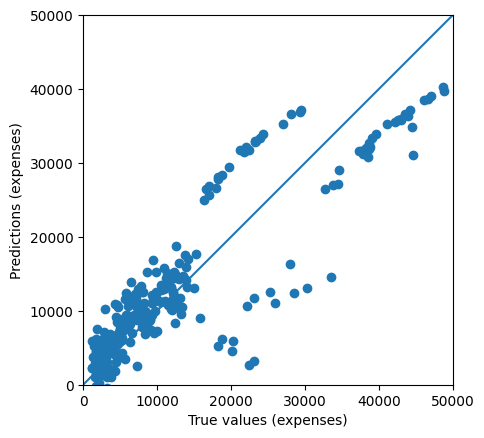

In [8]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_predictions = model.predict(test_dataset)

mae = mean_absolute_error(test_labels, test_predictions)
mse = mean_squared_error(test_labels, test_predictions)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 4500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)